In [5]:
import os
import zipfile

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

In [4]:
pip install scikit-image


   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB 1.9 MB/s eta 0:00:07
   ---------------------------------------- 0.0/12.8 MB 1.9 MB/s eta 0:00:07
   ---------------------------------------- 0.1/12.8 MB 655.4 kB/s eta 0:00:20
   ---------------------------------------- 0.1/12.8 MB 847.9 kB/s eta 0:00:15
    --------------------------------------- 0.2/12.8 MB 915.1 kB/s eta 0:00:14
    --------------------------------------- 0.2/12.8 MB 1.0 MB/s eta 0:00:13
   - -------------------------------------- 0.3/12.8 MB 964.9 kB/s eta 0:00:13
   - -------------------------------------- 0.3/12.8 MB 952.6 kB/s eta 0:00:14
   - -------------------------------------- 0.4/12.8 MB 946.4 kB/s eta 0:00:14
   - -------------------------------------- 0.4/12.8 MB 981.9 kB/s eta 0:00:13
   - -------------------------------------- 0.4/12.8 MB 981.9 kB/s eta 0:00:13
   - -------------------------------------- 0.6/12.8 MB 992.2 kB/s 


[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
def load_images_from_directory(directory):
    return [os.path.join(directory, filename) for filename in os.listdir(directory)]
def create_dataset(image_paths):
    targets = [os.path.basename(path).split('.')[0] for path in image_paths]
    dataset = pd.DataFrame({'image_path': image_paths, 'target': targets})
    return dataset

def preprocess_image(image_path):
    img = imread(image_path)
    img = resize(img, (64, 64))
    img_flat = img.flatten()
    return img_flat

def preprocess_dataset(dataset):
    X = np.array([preprocess_image(image_path) for image_path in dataset['image_path']])
    y = dataset['target']
    return X, y

def visualize_images(image_paths, rows=5, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
    for i, ax in enumerate(axes.flat):
        if i < len(image_paths):
            img = mpimg.imread(image_paths[i])
            ax.imshow(img)
            ax.axis('off')
    plt.tight_layout()
    plt.show()

In [13]:
def main():
    train_dir = r'E:\BDA 2ND SEM\prodigy\houseprice\catdog\train'
    test_dir = r'E:\BDA 2ND SEM\prodigy\houseprice\catdog\test1'

    train_images = load_images_from_directory(train_dir)
    test_images = load_images_from_directory(test_dir)

    dataset = create_dataset(train_images)
    print(f'Total images: {len(dataset)}')
    print(dataset['target'].value_counts())

    visualize_images(train_images[:25])

    X, y = preprocess_dataset(dataset)

    pca = PCA(n_components=100)
    X_pca = pca.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=42)

    clf = svm.SVC(kernel='rbf')
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    X_test_preprocessed = np.array([preprocess_image(image_path) for image_path in test_images])
    X_test_pca = pca.transform(X_test_preprocessed)

    test_predictions = clf.predict(X_test_pca)
    test_predictions_mapped = [1 if label == 'dog' else 0 for label in test_predictions]

    predictions_df = pd.DataFrame({'id': range(1, len(test_predictions_mapped) + 1), 'label': test_predictions_mapped})
    predictions_df.to_csv('svm_test_predictions.csv', index=False)

    print(predictions_df.head())

Total images: 25000
target
cat    12500
dog    12500
Name: count, dtype: int64


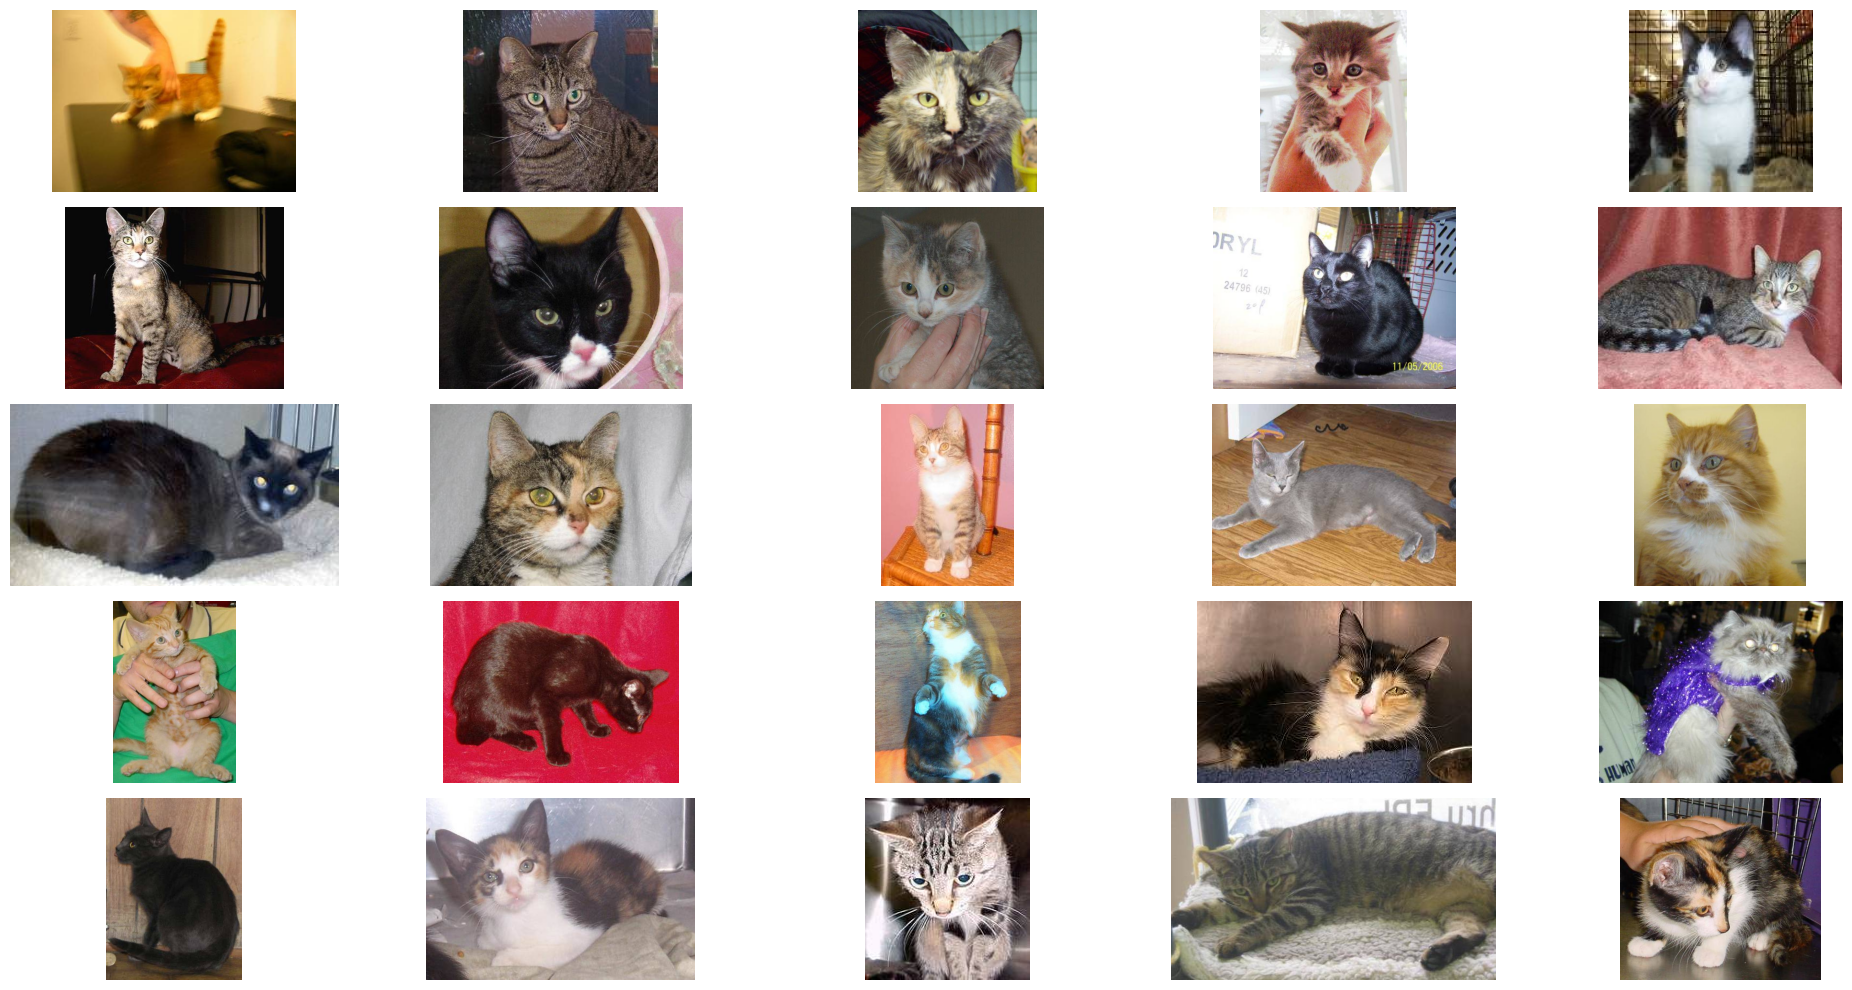

Accuracy: 0.6794
   id  label
0   1      0
1   2      0
2   3      0
3   4      0
4   5      1


In [14]:
if __name__ == "__main__":
    main()